In [1]:
import cellpose
import torch 
import torchvision
import zarr
import numpy as np
import scipy as sp
import squidpy as sq
import numpy as np
import matplotlib.pyplot as plt
import dask.dataframe as dd
import dask.array as da
import dask.bag as db
import pandas as pd
import pyseq
from pyseq import image_analysis as ia
from dask.distributed import Client
import xarray as xr
import dask
import imageio

In [2]:
import numpy as np
import time, os, sys, random
from urllib.parse import urlparse
import skimage.io
import matplotlib.pyplot as plt
import matplotlib as mpl
import skimage

In [3]:
from cellpose import core, utils, io, models, metrics
from glob import glob

In [12]:
core.use_gpu()

2022-08-02 15:40:37,209 [INFO] ** TORCH CUDA version installed and working. **


True

In [4]:
from glob import glob
use_GPU = core.use_gpu()
yn = ['NO', 'YES']
print(f'>>> GPU activated? {yn[use_GPU]}')

>>> GPU activated? YES


In [5]:
# model_type='cyto' or 'nuclei' or 'cyto2'
# start logger (to see training across epochs)
logger = io.logger_setup()


2022-08-02 15:26:12,351 [INFO] WRITING LOG OUTPUT TO /gpfs/commons/home/jsingh/.cellpose/run.log


In [6]:
model = models.CellposeModel(gpu=use_GPU,model_type='TN2')

2022-08-02 15:26:12,358 [INFO] >> TN2 << model set to be used
2022-08-02 15:26:12,360 [INFO] ** TORCH CUDA version installed and working. **
2022-08-02 15:26:12,361 [INFO] >>>> using GPU
2022-08-02 15:26:12,629 [INFO] >>>> model diam_mean =  30.000 (ROIs rescaled to this size during training)


In [7]:
im = ia.get_HiSeqImages(image_path = '/gpfs/commons/home/jsingh/zarrs/m387ntga2.zarr')

ImageAnalysis::Opened m387ntga2 


/gpfs/commons/home/jsingh/PySeq2500/pyseq/image_analysis.py:955: RuntimeWarning: Failed to open Zarr store with consolidated metadata, falling back to try reading non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=False, to avoid trying to read consolidate metadata, or
3. Explicitly setting consolidated=True, to raise an error in this case instead of falling back to try reading non-consolidated metadata.
  im = xr.open_zarr(fn).to_array()


In [8]:
one_z_plane = im.im.sel(obj_step = 8498, channel = 558, cycle=1)

In [9]:
arr = one_z_plane.values

In [10]:
channels = [0,0]

In [11]:
masks, flows, styles = model.eval(arr, diameter=None, channels=channels, cellprob_threshold= -6, flow_threshold= 1000)

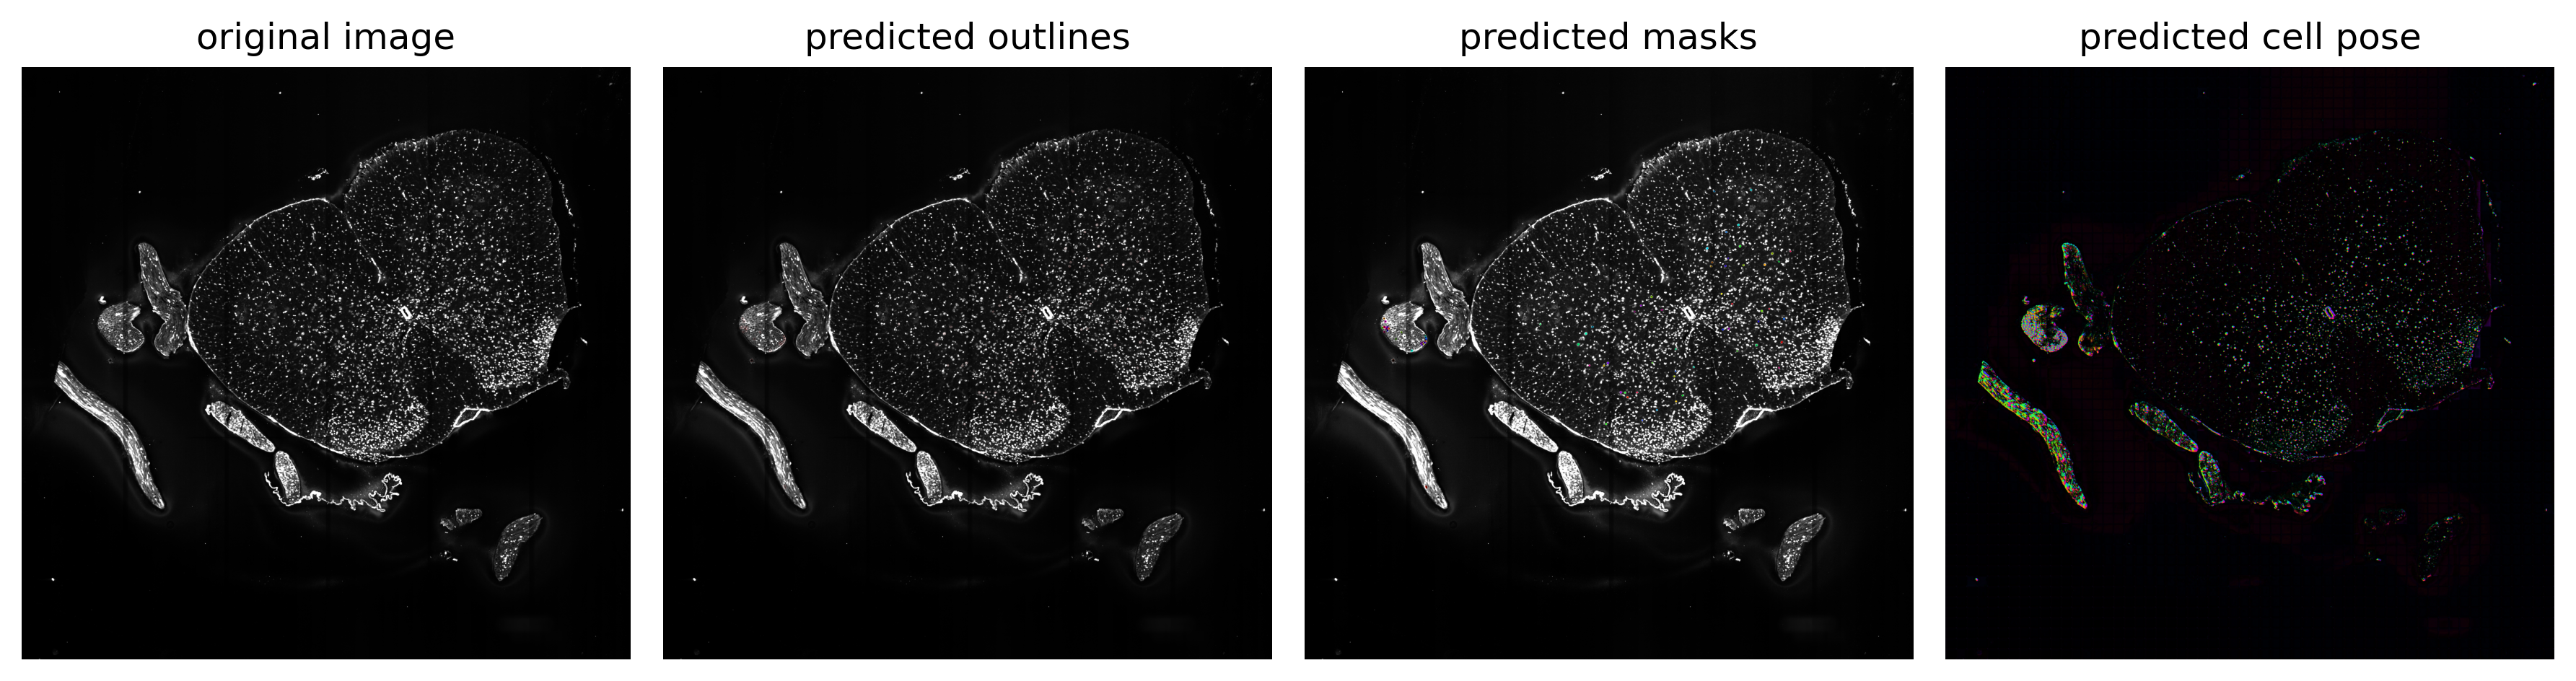

In [17]:
# DISPLAY RESULTS
from cellpose import plot

fig = plt.figure(figsize=(12,5), dpi = 300)
plot.show_segmentation(fig, arr, masks, flows[0], channels= channels,  file_name = 'test_file.tiff')
plt.tight_layout()
plt.show()


In [29]:
imageio.imwrite('masks_final.tiff', masks)

In [9]:
import skimage

In [10]:
import pkg_resources
import types
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            # Split ensures you get root package, 
            # not just imported function
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]

        # Some packages are weird and have different
        # imported names vs. system/pip names. Unfortunately,
        # there is no systematic way to get pip names from
        # a package's imported name. You'll have to add
        # exceptions to this list manually!
        poorly_named_packages = {
            "PIL": "Pillow",
            "sklearn": "scikit-learn"
        }
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]

        yield name
imports = list(set(get_imports()))

# The only way I found to get the version of the root package
# from only the name of the package is to cross-check the names 
# of installed packages vs. imported packages
requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))

for r in requirements:
    print("{}=={}".format(*r))

distributed==2022.5.2
dask==2022.5.2
xarray==2022.3.0
matplotlib==3.5.2
imageio==2.19.2
zarr==2.10.3
cellpose==2.0.5
numpy==1.21.5
torch==1.11.0
scipy==1.8.1
pandas==1.4.3
squidpy==1.2.2
torchvision==0.12.0


In [46]:
import subprocess
result = subprocess.run(['sinfo -p gpu | grep idle'],shell=True,capture_output=True,text=True)

lines = result.stdout.splitlines()

if 'idle' in lines[1]:
    print('Gpu Not Idle')

IndexError: list index out of range

In [48]:
type(result)

subprocess.CompletedProcess

In [50]:
type(result.stdout)

str